<h1 align = center> 100 Days of Machine Learning - Day 5

100 days of machine learning is a tech challenge where the participants spend 100 continuous days studying, learning and coding machine learning concepts. It involves dedicating a certain amount of time each day to engage in ML-related activities, such as reading books, watching tutorials, completing online courses, working on projects, or participating in coding exercises. The goal is to develop a consistent learning habit and make significant progress in ML skills over the course of 100 days.

# Table of Contents

1. Multiple LR
2. SVM
3. Naive Bayes

# Multiple Linear Regression

It is a variation or type of LR which tries to predict an output/target variable y given a variety of input features x1, x2, x3 and so on.

The goal is to find the best fitting linear equation which can predict the dependent variable based on the values of all the chosen independent variables.

$$

Y = \beta _0 + X_1 \beta _1 + X_2 \beta _2 + X_3 \beta _3 ...

where y is the dependent variable, X1 X2 X3 are the input features and Beta is the coefficient

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data = pd.read_csv('data/car_prices_dataset.csv')

In [75]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [76]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [77]:
data = data.select_dtypes(exclude=object)

In [78]:
data.dtypes

car_ID                int64
symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

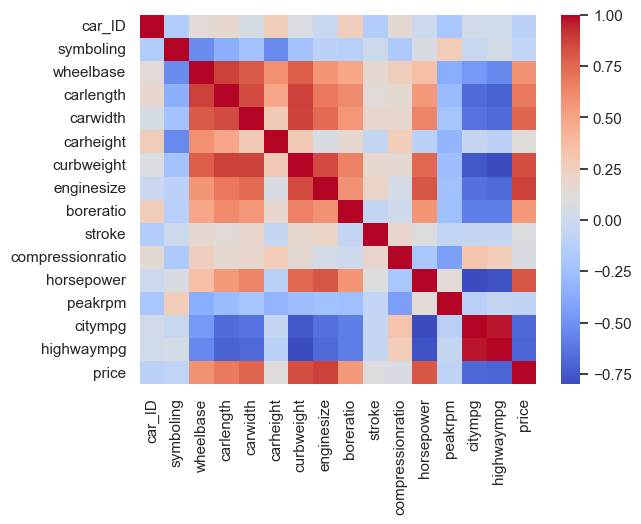

In [79]:
data_corr = data.corr()
sns.heatmap(data_corr, annot=False, cmap='coolwarm')
sns.set(rc={'text.color':'red'})
plt.show()

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
regress = LinearRegression()

In [82]:
horsepower = np.array(data.horsepower)
curbweight = np.array(data.curbweight)
enginesize = np.array(data.enginesize)
price = np.array(data.price)


In [83]:
x = np.array([horsepower, curbweight,enginesize])

In [84]:
x.shape

(3, 205)

In [90]:
x = np.transpose(x)
x.shape

(205, 3)

In [91]:
price.shape

(205,)

In [92]:
regress.fit(x,price)

LinearRegression()

In [97]:
from sklearn.metrics import r2_score, mean_squared_error
pred = regress.predict(x)
mse = mean_squared_error(price, pred)
r2 = r2_score(price, pred)

In [98]:
print("MSE : ", mse)
print("R-Squared Error", r2)
print("B or Y intercept : ", regress.intercept_)
print("coeffecient or slope: ", regress.coef_)

MSE :  11824364.398432123
R-Squared Error 0.8138201347761836
B or Y intercept :  -13463.788694053841
coeffecient or slope:  [48.74726003  4.26255151 84.87963009]
